In [1]:
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import FlatwCDM
from astropy.cosmology import LambdaCDM
import astropy.units as au
import astropy.constants as ac
import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt 
import uncertainties as unc
from uncertainties import unumpy

### Task 0: Read the data

First, read in the data from the SN_data.csv file. Many libraries can do this, astropy is one of them. When using your favorite IDE you can see two neat functions when simply typing the table name in a code cell. Then merge the relevant columns into on big ``SN_data`` table.

In [2]:
mlcs = Table.read("MLCS.csv")
snapshot = Table.read("Snapshot.csv")

In [3]:
snapshot.show_in_notebook()

idx,SN,Z,mu_0,mu_0_err
0,1995ao,0.3,40.74,0.6
1,1995ap,0.23,40.33,0.46
2,1996R,0.16,39.08,0.4
3,1996T,0.24,40.68,0.43
4,1997Ia,0.17,39.95,0.24
5,1997apa,0.83,43.67,0.35


In [4]:
# merge
# SN_data = vstack([SN_data_low_z, SN_data_high_z])
SN_data = vstack([mlcs, snapshot])
SN_data.show_in_notebook()

idx,SN,Z,m_B_max,m_B_max_err,m_V_max,m_V_max_err,mu_0(TF),mu_0(TF)_err,mu_0,mu_0_err
0,1996E,0.43,22.72,0.1,22.6,0.12,42.03,0.22,41.74,0.28
1,1996H,0.62,23.31,0.06,23.57,0.06,43.01,0.15,42.98,0.17
2,19961,0.57,23.42,0.08,23.61,0.08,42.83,0.21,42.76,0.19
3,1996J,0.3,22.28,0.05,22.06,0.05,40.99,0.25,41.38,0.24
4,1996K,0.38,22.8,0.05,22.86,0.08,42.21,0.18,41.63,0.2
5,1996U,0.43,22.77,0.05,22.96,0.11,42.34,0.17,42.55,0.25
6,1997ce,0.44,22.83,0.05,22.92,0.05,42.26,0.16,41.95,0.17
7,1997cj,0.5,23.29,0.05,23.29,0.05,42.7,0.16,42.4,0.17
8,1997ck,0.97,24.78,0.16,--,--,44.3,0.19,44.39,0.3
9,1995K,0.48,22.92,0.08,23.07,0.07,42.49,0.17,42.45,0.17


### Task 1: Plot the maximum magnitude against redshift, including the errors in magnitude

It's always good to get a feeling for the data you're working with and a plot helps to visualize the data. Is anything unexpected in the plot?

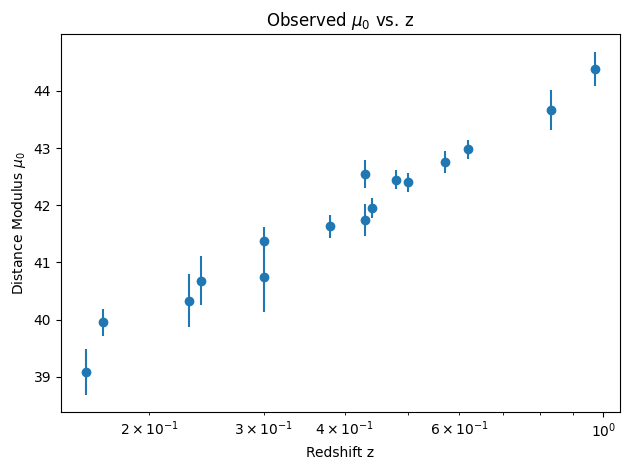

In [5]:
plt.errorbar(x = SN_data["Z"], y = SN_data["mu_0"], yerr = SN_data["mu_0_err"], fmt = "o")
plt.title(r"Observed $\mu_0$ vs. z")
plt.xlabel("Redshift z")
plt.ylabel(r"Distance Modulus $\mu_0$")
plt.xscale("log")
plt.tight_layout()
plt.show()

### Task 4: Plot both the luminosity distance vs redshift from Planck and the calculated values from the SN

In [6]:
# Calculate the luminosity distance using Planck18 cosmology
zs = np.linspace(min(SN_data["Z"]), max(SN_data["Z"]), 100)
planck_luminosity_distances = cosmo.distmod(zs)
planck_luminosity_distances[:4]

<Quantity [39.49055269, 39.60959988, 39.72338062, 39.83236354] mag>

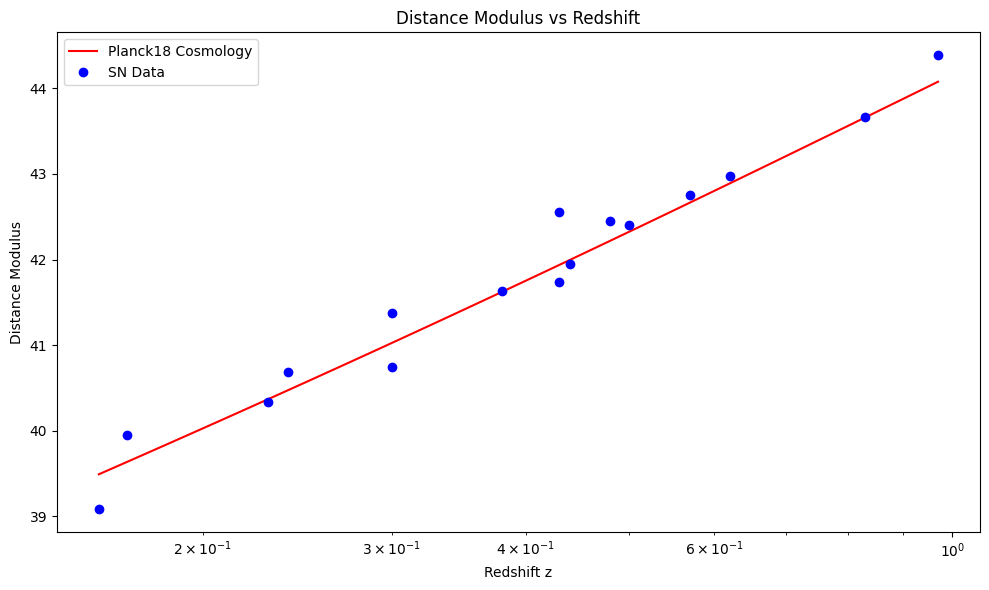

In [7]:
# Plot the luminosity distance vs redshift
plt.figure(figsize=(10, 6))
plt.plot(zs, planck_luminosity_distances, 'r-', label='Planck18 Cosmology')
plt.plot(SN_data['Z'], SN_data['mu_0'], 'bo', label='SN Data')
plt.xlabel('Redshift z')
plt.ylabel('Distance Modulus')
plt.title('Distance Modulus vs Redshift')
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()

### Task 5: Add multiple different cosmologies & compare

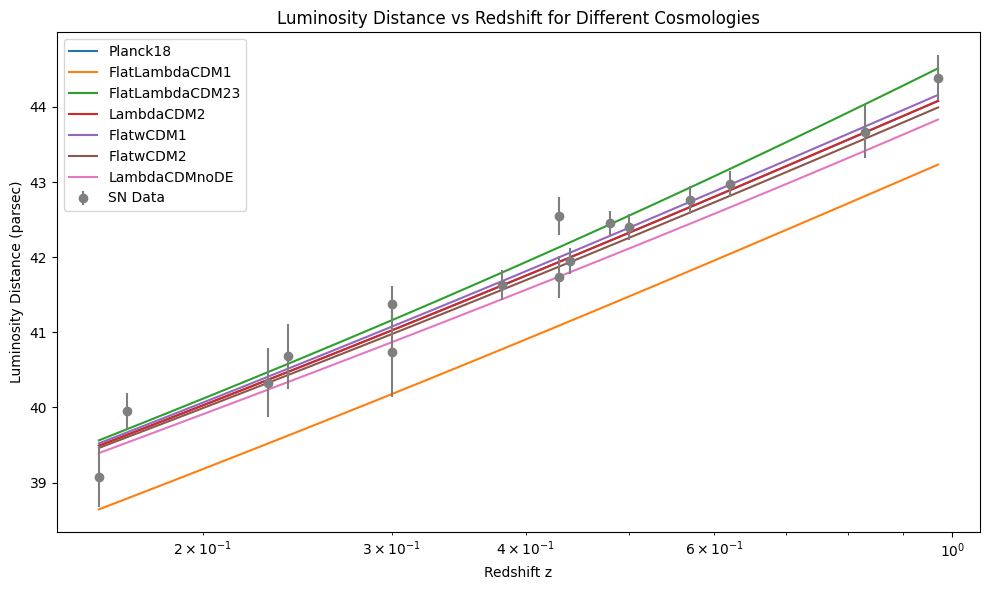

In [8]:
# Define different cosmologies
cosmologies = {
    'Planck18': cosmo,
    'FlatLambdaCDM1': FlatLambdaCDM(H0=100, Om0=0.30966),
    'FlatLambdaCDM23': FlatLambdaCDM(H0=67.66, Om0=0.049),
    'LambdaCDM2': LambdaCDM(H0=67.66, Om0=0.30966, Ode0 = 0.69),
    'FlatwCDM1': FlatwCDM(H0=67.66, Om0=0.308, w0=-1.2),
    'FlatwCDM2': FlatwCDM(H0=67.66, Om0=0.308, w0=-0.8),
    'LambdaCDMnoDE': LambdaCDM(H0 = 67.66, Om0 = 0.308, Ode0=0),
}

# Calculate luminosity distances for each cosmology
distmods_cosmologies = {}
for name, cos in cosmologies.items():
    distmods_cosmologies[name] = cos.distmod(zs)

# Plot the luminosity distance vs redshift for each cosmology
plt.figure(figsize=(10, 6))
for name, mu in distmods_cosmologies.items():
    plt.plot(zs, mu, label=name)
plt.errorbar(SN_data['Z'], SN_data['mu_0'], yerr = SN_data['mu_0_err'], fmt = 'o', label='SN Data')
plt.xlabel('Redshift z')
plt.ylabel('Luminosity Distance (parsec)')
plt.title('Luminosity Distance vs Redshift for Different Cosmologies')
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()

### Task 6: What is the dark energy fraction in our universe given the SN data?

We want to find out what parameters we can constrain from the given data. For this, we suggest the following: 
- start with trying to constrain only the matter density $\Omega_m$, by imposing no curvature in your cosmological model. Which model is that? Use it directly from astropy and set the Hubble parameter to 65.2 (that's the measured parameter from Riess et. al)!
- try to write the corresponding function to be fit and use astropy's built-in function to evaluate the parameter of interest
- fit the function, using e.g. a starting value of $\Omega_m \approx 0.3$. Also you can restrict this to positive values, since (by the pure existence of you & me) that there is *some* matter.
- Redo the above steps trying to constrain at least one more cosmological parameter, e.g. by not requiring a non-flat universe. 
- If you can, try to constrain all model parameters ($H_{0}, \Omega_m, \Omega_\lambda $) in a (curved) $\lambda CDM$ model.


Feel free to play around with some cosmologies!

In [9]:
def distmod_fit_function_fldaCDM(z, Om0):
    cosmology = FlatLambdaCDM(H0=65.2, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_fldaCDM_H0(z, H0, Om0):
    cosmology = FlatLambdaCDM(H0=H0, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_ldaCDM(z, Om0, Ode0):
    cosmology = LambdaCDM(H0=65.2, Om0=Om0, Ode0 = Ode0)
    return cosmology.distmod(z).value

def distmod_fit_function_ldaCDM_H0(z, H0, Om0, Ode0):
    cosmology = LambdaCDM(H0=H0, Om0=Om0, Ode0 = Ode0)
    return cosmology.distmod(z).value

def distmod_fit_function_flatwCDM(z, w0, Om0):
    cosmology = FlatwCDM(H0=65.2, w0 = w0, Om0=Om0)
    return cosmology.distmod(z).value

def distmod_fit_function_flatwCDM_H0(z, H0, w0, Om0):
    cosmology = FlatwCDM(H0=H0, w0 = w0, Om0=Om0)
    return cosmology.distmod(z).value

In [10]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [ ]:
least_squares_fldaCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_fldaCDM)
least_squares_fldaCDM_HO = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_fldaCDM_H0)
least_squares_ldaCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_ldaCDM)
least_squares_ldaCDM_H0 = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_ldaCDM_H0)
least_squares_fwCDM = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_flatwCDM)
least_squares_fwCDM_H0 = LeastSquares(SN_data["Z"], SN_data["mu_0"], SN_data["mu_0_err"], distmod_fit_function_flatwCDM_H0)

m_fldaCDM = Minuit(least_squares_fldaCDM, Om0=0.3)  # starting values for Om0
m_fldaCDM_H0 = Minuit(least_squares_fldaCDM_HO, H0 = 65, Om0=0.3)  # starting values for Om0 & H0
m_ldaCDM = Minuit(least_squares_ldaCDM, Om0=0.3, Ode0=0.7)  # starting values for Om0 and Ode0
m_ldaCDM_H0 = Minuit(least_squares_ldaCDM_H0, H0 = 65, Om0=0.3, Ode0=0.7)  # starting values for Om0 and Ode0 and H0
m_fwCDM = Minuit(least_squares_fwCDM, w0 = -1, Om0=0.3)  # starting values for Om0 and Ode0 and H0
m_fwCDM_H0 = Minuit(least_squares_fwCDM_H0, H0 = 65, w0 = -1, Om0=0.3)  # starting values for Om0 and Ode0 and H0

In [12]:
m_fldaCDM.limits = [(0, None)]
m_fldaCDM.migrad()  # finds minimum of least_squares function
m_fldaCDM.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.49 (χ²/ndof = 0.8)      │              Nfcn = 18               │
│ EDM = 1.11e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Om0  │   0.26    │   0.08    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────┐
│     │     Om0 │
├─────┼─────────┤
│ Om0 │ 0.00576 │
└─────┴─────────┘

In [13]:
m_fldaCDM_H0.limits = [(0, None), (0, None)]
m_fldaCDM_H0.migrad()  # finds minimum of least_squares function
m_fldaCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.47 (χ²/ndof = 0.8)      │              Nfcn = 40               │
│ EDM = 1.25e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    64     │     6     │            │            │    0    │         │       │
│ 1 │ Om0  │   0.29    │   0.26    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────┐
│     │     H0    Om0 │
├─────┼───────────────┤
│  H0 │   35.1  -1.53 │
│ Om0 │  -1.53 0.0728 │
└─────┴───────────────┘

In [14]:
m_ldaCDM.limits = [(0, None), (0, None)]
m_ldaCDM.migrad()  # finds minimum of least_squares function
m_ldaCDM.hesse()   # accurately computes uncertainties


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.48 (χ²/ndof = 0.8)      │              Nfcn = 54               │
│ EDM = 4.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Om0  │    0.2    │    0.5    │            │            │    0    │         │       │
│ 1 │ Ode0 │    0.7    │    0.7    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────┐
│      │   Om0  Ode0 │
├──────┼─────────────┤
│  Om0 │ 0.432   0.5 │
│ Ode0 │   0.5 0.595 │
└──────┴─────────────┘

In [15]:
m_ldaCDM_H0.limits = [(None, None), (0, None), (None, None)]
m_ldaCDM_H0.migrad()  # finds minimum of least_squares function
m_ldaCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.34 (χ²/ndof = 0.9)      │              Nfcn = 150              │
│ EDM = 0.000142 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    62     │     8     │            │            │         │         │       │
│ 1 │ Om0  │    0.0    │    1.9    │            │            │    0    │         │       │
│ 2 │ Ode0 │    0.1    │    0.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────┐
│      │      H0     Om0    Ode0 │
├──────┼─────────────────────────┤
│   H0 │    60.7   0.052     7.1 │
│  Om0 │   0.052 0.00803   0.015 │
│ Ode0 │     7.1   0.015   0.886 │
└──────┴─────────────────────────┘

In [16]:
m_fwCDM.limits = [(None, None), (0, None)]
m_fwCDM.migrad()  # finds minimum of least_squares function
m_fwCDM.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.49 (χ²/ndof = 0.8)      │              Nfcn = 72               │
│ EDM = 3.73e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ w0   │   -0.9    │    1.3    │            │            │         │         │       │
│ 1 │ Om0  │    0.2    │    0.5    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────┐
│     │    w0   Om0 │
├─────┼─────────────┤
│  w0 │  1.75  -0.9 │
│ Om0 │  -0.9 0.501 │
└─────┴─────────────┘

In [17]:
m_fwCDM_H0.limits = [(None, None), (None, None), (0, None)]
m_fwCDM_H0.migrad()  # finds minimum of least_squares function
m_fwCDM_H0.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.38 (χ²/ndof = 0.9)      │              Nfcn = 224              │
│ EDM = 0.000112 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ H0   │    63     │     6     │            │            │         │         │       │
│ 1 │ w0   │   -0.53   │   0.32    │            │            │         │         │       │
│ 2 │ Om0  │    0.0    │    2.7    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────────────────┐
│     │     H0     w0    Om0 │
├─────┼──────────────────────┤
│  H0 │   33.7  -1.71  0.030 │
│  w0 │  -1.71  0.102 -0.012 │
│ Om0 │  0.030 -0.012 0.0149 │
└─────┴──────────────────────┘